## [DE 개발 사전 과제 - 신입](https://www.notion.so/DE-844fea84b1624c9fa459ebdf51a122fd)

- 데이터 전처리 빼기

### 라이브러리 

In [38]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

### 데이터 읽어오기

In [39]:
nov_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2019-Nov.csv',nrows =1000000)
nov_data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


### 데이터 info

In [40]:
nov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1000000 non-null  object 
 1   event_type     1000000 non-null  object 
 2   product_id     1000000 non-null  int64  
 3   category_id    1000000 non-null  int64  
 4   category_code  683023 non-null   object 
 5   brand          852803 non-null   object 
 6   price          1000000 non-null  float64
 7   user_id        1000000 non-null  int64  
 8   user_session   1000000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 68.7+ MB


### 1. 해당 전체 기간에서, KST 기준으로 active user 수가 제일 큰 날짜를 구하세요



In [5]:
nov_data['event_time'] = nov_data["event_time"].replace('UTC', '', regex=True) #KST 변환을 위해 UTC 제거 
nov_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
3,2019-11-01 00:00:01,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
5,2019-11-01 00:00:01,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685,816a59f3-f5ae-4ccd-9b23-82aa8c23d33c
...,...,...,...,...,...,...,...,...,...
999986,2019-11-01 15:32:09,view,10900168,2053013555069845885,appliances.kitchen.mixer,kitfort,112.21,513769776,b022b566-bfe6-402d-97a1-97d6c5e25451
999989,2019-11-01 15:32:09,view,46800028,2110187395394568257,appliances.kitchen.refrigerators,coolfort,77.20,517774726,37296599-f700-4b74-84a3-298134813eb4
999993,2019-11-01 15:32:09,view,1005160,2053013555631882655,electronics.smartphone,xiaomi,211.32,552024896,16f59979-9d95-41e5-9e45-5ee3171accb8
999996,2019-11-01 15:32:09,view,2800546,2053013563835941749,appliances.kitchen.refrigerators,xing,192.51,513747948,d9ae554d-1841-412d-aefb-daa105910574


In [6]:
format = '%Y-%m-%d %H:%M:%S' 
nov_data['event_time'] = pd.to_datetime(nov_data['event_time'], format=format) # str 형식을 datetime 형식으로 변환

In [7]:
nov_data['event_time'] = nov_data['event_time'] + datetime.timedelta(hours=9) #UTC KST 변환

In [8]:
user_count  = nov_data['event_time'].dt.strftime('%Y-%m-%d').value_counts() #날짜별 active user 
bigDate = user_count.index[0] #날짜별 active user user 중 가장큰  날짜
bigDate

'2019-11-01'

### 2. 1의 날짜에서, 세션이 가장 긴 사용자 10명에 대해 "user_id, session_id, 세션시간"를 구하세요

In [9]:
bigDate_list = nov_data[nov_data['event_time'].dt.strftime('%Y-%m-%d') ==bigDate ] # 전체 데이터중 1의 날짜에 해당하는 데이터만 추출 

In [10]:
user_id_list = list(set(bigDate_list['user_id'])) # user_id 중복 제거 

In [11]:
session_time = []
userId = []
session_id = []
for user_id in user_id_list:
  session_cal = bigDate_list[bigDate_list['user_id']==user_id]
  userId.append(session_cal['user_id'].values[0]) # 같은 값 이므로 첫번째 값을 대입  
  session_id.append(session_cal['user_session'].values[0])
  session_time.append(max(session_cal['event_time'])-min(session_cal['event_time']))

long_session_user = pd.DataFrame({'user_id':userId,'session_id':session_id,'sesssion_time':session_time})

In [12]:
bigDate_list[bigDate_list['user_id']==user_id_list[2]]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
617327,2019-11-01 19:49:56,view,5100846,2053013553341792533,electronics.clocks,xiaomi,179.93,537133063,a4cb533c-5604-4ef8-831f-e0d0eac6b2cc
618240,2019-11-01 19:50:40,view,5100846,2053013553341792533,electronics.clocks,xiaomi,179.93,537133063,a4cb533c-5604-4ef8-831f-e0d0eac6b2cc
619906,2019-11-01 19:51:59,view,5100846,2053013553341792533,electronics.clocks,xiaomi,179.93,537133063,a4cb533c-5604-4ef8-831f-e0d0eac6b2cc
622037,2019-11-01 19:53:39,view,5100846,2053013553341792533,electronics.clocks,xiaomi,179.93,537133063,00eee906-c0e3-46cb-a0a7-047f45401117


In [13]:
long_session_user = long_session_user.sort_values(by=['sesssion_time'], axis=0,ascending=False)[0:10].reset_index(drop=True)
long_session_user

,user_id,session_id,sesssion_time
0,540508491,33a0d8f4-c388-4ce7-85f4-7b1f11563d6a,0 days 14:50:27
1,566143627,aa610ab3-5c60-4551-8a2b-8c999dddf843,0 days 14:50:12
2,565996493,79bb7f6b-d8a5-44d3-9f08-c61267c30181,0 days 14:35:56
3,554428024,327317f9-d39f-4a24-b123-5fa9d17c310c,0 days 14:34:43
4,525599966,b650cb3d-900a-4603-a4ef-2caf68e3744e,0 days 14:33:21
5,517775322,723a4611-2a88-4e0f-a4c5-6e49ea19e1cb,0 days 14:28:01
6,520934632,27514f98-ca4a-416d-9540-dad3ac469c55,0 days 14:24:37
7,565855130,412a01fe-f7a0-4d99-ab0c-db4fc64cbb65,0 days 14:23:05
8,519155085,084a39d2-894f-436e-82f6-dcce242b389f,0 days 14:16:45
9,556551950,69726a09-7176-4b7f-9690-f301ad082962,0 days 14:14:08


### 3. 1의 날짜의 15분단위로 active user 수를 구하세요


In [14]:
bigDate_list.resample('15T', on='event_time').user_id.count()

event_time
2019-11-01 09:00:00     1256
2019-11-01 09:15:00     1350
2019-11-01 09:30:00     1705
2019-11-01 09:45:00     1738
2019-11-01 10:00:00     1314
2019-11-01 10:15:00      617
2019-11-01 10:30:00     2868
2019-11-01 10:45:00     3472
2019-11-01 11:00:00     4024
2019-11-01 11:15:00     4714
2019-11-01 11:30:00     5234
2019-11-01 11:45:00     5693
2019-11-01 12:00:00     6505
2019-11-01 12:15:00     6977
2019-11-01 12:30:00     7758
2019-11-01 12:45:00     8361
2019-11-01 13:00:00     8517
2019-11-01 13:15:00     9200
2019-11-01 13:30:00     9961
2019-11-01 13:45:00     9876
2019-11-01 14:00:00    10249
2019-11-01 14:15:00    11359
2019-11-01 14:30:00    12215
2019-11-01 14:45:00    11780
2019-11-01 15:00:00    11645
2019-11-01 15:15:00    12042
2019-11-01 15:30:00    11624
2019-11-01 15:45:00    11749
2019-11-01 16:00:00    11691
2019-11-01 16:15:00    12249
2019-11-01 16:30:00    12774
2019-11-01 16:45:00    12609
2019-11-01 17:00:00    12251
2019-11-01 17:15:00    12352
201

### 4. 1의 날짜에서 view → cart → purchase 이벤트 진행에 따른 funnel 수치를 구하세요

- view,  cart, purchase 3개의 구간으로 구분을 해준다

In [15]:
funnel_dict = {'view':1,'cart':2,'purchase':3}
funnel_steps = pd.DataFrame.from_dict(funnel_dict,orient='index',columns=['step_no'])
funnel_steps
#|bigDate_list[bigDate_list['user_id']==557746614]

,step_no
view,1
cart,2
purchase,3


In [37]:
grouped = bigDate_list.groupby(['user_session','event_type'])['event_time'].agg(np.min) 
grouped = pd.DataFrame(grouped).merge(funnel_steps,left_on='event_type',right_index=True)
grouped

,,event_time,step_no
user_session,event_type,,
00006bc8-78c7-4100-ba97-37352c9af491,view,2019-11-01 21:01:35,1
00008ebc-a8c1-48c2-beb9-aa4448e93639,view,2019-11-01 22:11:19,1
0000b0f0-9fb0-41a3-bdfa-3fa1d28b2e7c,view,2019-11-01 19:37:08,1
00010669-878a-4f17-82b6-844d74d94d47,view,2019-11-01 16:41:52,1
00014981-98a1-41c7-b284-2aec59c744ea,view,2019-11-01 16:25:57,1
...,...,...,...
ffd9a8a5-d76c-4f99-8264-96d113fe01ed,purchase,2019-11-01 18:33:27,3
ffdf6340-6d82-43de-a502-549571ad5581,purchase,2019-11-01 13:05:28,3
ffe4d135-300b-4721-9369-cbea9bbec95b,purchase,2019-11-01 17:23:32,3


In [17]:
funnel = grouped.reset_index().pivot(index='user_session',columns='step_no',values='event_time')
funnel

step_no,1,2,3
user_session,,,
00006bc8-78c7-4100-ba97-37352c9af491,2019-11-01 21:01:35,NaT,NaT
00008ebc-a8c1-48c2-beb9-aa4448e93639,2019-11-01 22:11:19,NaT,NaT
0000b0f0-9fb0-41a3-bdfa-3fa1d28b2e7c,2019-11-01 19:37:08,NaT,NaT
00010669-878a-4f17-82b6-844d74d94d47,2019-11-01 16:41:52,NaT,NaT
00014981-98a1-41c7-b284-2aec59c744ea,2019-11-01 16:25:57,NaT,NaT
...,...,...,...
fffde885-885e-40ac-b978-342ec524163b,2019-11-01 23:43:35,NaT,NaT
fffe720e-3ec9-4860-a8d7-5a3c8e354fc9,2019-11-01 23:34:01,NaT,NaT
ffff6a98-e9f4-4e59-9430-725071c52d43,2019-11-01 17:58:04,NaT,NaT


In [18]:
funnel.columns = funnel_steps.index
funnel

,view,cart,purchase
user_session,,,
00006bc8-78c7-4100-ba97-37352c9af491,2019-11-01 21:01:35,NaT,NaT
00008ebc-a8c1-48c2-beb9-aa4448e93639,2019-11-01 22:11:19,NaT,NaT
0000b0f0-9fb0-41a3-bdfa-3fa1d28b2e7c,2019-11-01 19:37:08,NaT,NaT
00010669-878a-4f17-82b6-844d74d94d47,2019-11-01 16:41:52,NaT,NaT
00014981-98a1-41c7-b284-2aec59c744ea,2019-11-01 16:25:57,NaT,NaT
...,...,...,...
fffde885-885e-40ac-b978-342ec524163b,2019-11-01 23:43:35,NaT,NaT
fffe720e-3ec9-4860-a8d7-5a3c8e354fc9,2019-11-01 23:34:01,NaT,NaT
ffff6a98-e9f4-4e59-9430-725071c52d43,2019-11-01 17:58:04,NaT,NaT


In [19]:
step_values = [funnel[column].notnull().sum() for column in funnel.columns]
step_values

[155995, 8103, 10719]

In [20]:
funnel.columns

Index(['view', 'cart', 'purchase'], dtype='object')

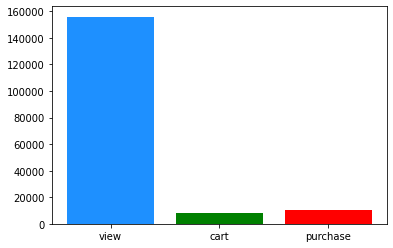

In [21]:
x = np.arange(3)
years = funnel.columns
values = step_values
colors = ['dodgerblue', 'g', 'r']

plt.bar(x, values, color=colors)
plt.xticks(x, years)

plt.show()

In [22]:
np.mean(funnel['cart']-funnel['view'])

Timedelta('0 days 00:03:39.611007809')

In [23]:
np.mean(funnel['purchase']-funnel['cart'])

Timedelta('0 days 00:02:27.281256633')